In [1]:
import tensorflow as tf
from utils import DataGenerator, config
import numpy as np
import matplotlib.pyplot as plt


from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly

In [2]:
sentinel2_image = f"{config.SENTINEL2_IMAGE_DIR}/resolution-10m/puszcza-karpacka-2022-06-small-resolution10m.tif"
inDataset = gdal.Open(sentinel2_image, GA_ReadOnly)

In [3]:
cols = inDataset.RasterXSize
rows = inDataset.RasterYSize
rows, cols

(2894, 3807)

In [4]:
x0 = 0
y0 = 0

G_shape = (rows, cols-x0,) + config.RGB_CHANNELS

G = np.zeros(G_shape)

rgb_channels = config.RGB_CHANNELS[0]

for b in range(rgb_channels):
    band = inDataset.GetRasterBand(rgb_channels-b)
    tmp = (band.ReadAsArray(x0,y0,cols-x0,rows-y0)/3000)*255.
    G[:,:,b] = np.where(tmp>255,255,tmp)

In [5]:
G.shape

(2894, 3807, 3)

(-0.5, 3806.5, 2893.5, -0.5)

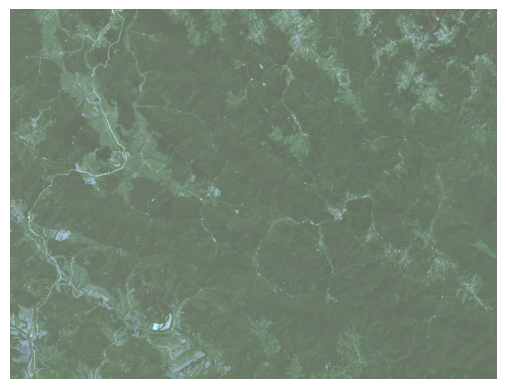

In [6]:
plt.imshow(G/255.)
plt.axis("off")

In [7]:
with open("./results/full-small-2022.npy", 'wb') as file:
    np.save(file, G)

## TRASH


In [6]:
np.unique(G[:, :, 0])

array([8.5000e-02, 1.7000e-01, 2.5500e-01, ..., 2.5449e+02, 2.5466e+02,
       2.5500e+02])

In [7]:
row_index = 100
rgb_sum = np.array([np.sum(G[row_index, column_index, :]) for column_index in range(cols)])

# finding the first element which is different from zero
index_to_cut = np.where(rgb_sum != 0.0)[0][0]

In [8]:
np.where(rgb_sum != 0.0)[0][-1]

3806

In [9]:
index_to_cut

0

(-0.5, 999.5, 999.5, -0.5)

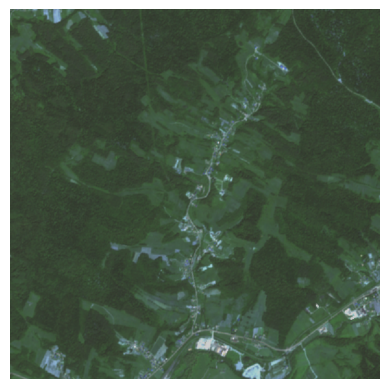

In [17]:
ss = 10

plt.imshow((G[:1000, index_to_cut:index_to_cut+1000, :]-50)/255.)
plt.axis("off")

In [2]:
def load_data():
    masks_dir = "C://Users//jjasi//datasets//ForestSegmented//masks"
    images_dir = "C://Users//jjasi//datasets//ForestSegmented//images"
    print(masks_dir)

    print(len(os.listdir(masks_dir)))
    data_gen = DataGenerator.DataGenerator(images_dir, masks_dir)

    data_gen.map_preprocess()

    return data_gen

In [3]:
data_gen = load_data()

C://Users//jjasi//datasets//ForestSegmented//masks
5108


tf.Tensor(b'C://Users//jjasi//datasets//ForestSegmented//images\\10452_sat_08.jpg', shape=(), dtype=string) tf.Tensor(b'C://Users//jjasi//datasets//ForestSegmented//masks\\10452_mask_08.jpg', shape=(), dtype=string)
<PIL.Image.Image image mode=RGB size=64x64 at 0x266D99ECA60>
tf.Tensor(b'C://Users//jjasi//datasets//ForestSegmented//images\\10452_sat_18.jpg', shape=(), dtype=string) tf.Tensor(b'C://Users//jjasi//datasets//ForestSegmented//masks\\10452_mask_18.jpg', shape=(), dtype=string)
<PIL.Image.Image image mode=RGB size=64x64 at 0x266D99ECFD0>


C:\Users\jjasi\AppData\Local\Temp\ipykernel_5672\3047415483.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(i + 1,2,1)
C:\Users\jjasi\AppData\Local\Temp\ipykernel_5672\3047415483.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(i + 1,2,2)


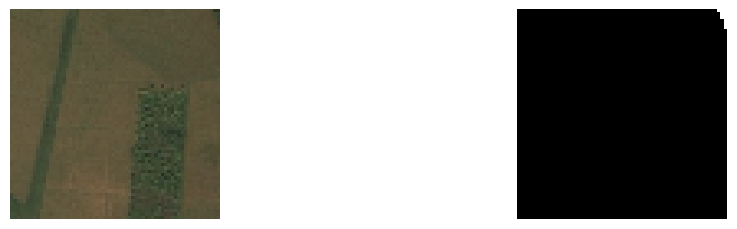

In [4]:
fig = plt.figure(figsize=(12,6))

for i, (img_path, mask_path) in enumerate(data_gen.dataset.take(2)):
    print(img_path, mask_path)
    img, mask = data_gen.load_and_process(img_path, mask_path)
    # with tf.Session() as sess:  print(img_path.eval()) 
    # img = plt.imread(str(img_path))
    # mask = plt.imread(str(mask_path))


    print(tf.keras.utils.array_to_img(img))
    plt.subplot(i + 1,2,1)
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(i + 1,2,2)
    plt.imshow(mask)
    plt.axis('off')
